<a href="https://colab.research.google.com/github/akhilasreeni/Marketing-Campaign-for-Banking-Products/blob/master/Marketing_Campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign for Banking Products**


> **GOAL:** The classification goal is to predict the likelihood of a liability customer buying personal
loans.

> **CONTEXT:** The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.


> **DATA DESCRIPTION:**
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

> **ATTRIBUTE INFORMATION:**
*   ID: Customer ID
*   Age: Customer's age in completed years
*   Experience: #years of professional experience
*   Income: Annual income of the customer 
*   ZIP Code: Home Address ZIP code.
*   Family: Family size of the customer
*   CCAvg: Avg. spending on credit cards per month 
*   Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional
*   Mortgage: Value of house mortgage if any. 
*   Personal Loan: Did this customer accept the personal loan offered in the last campaign?
*   Securities Account: Does the customer have a securities account with the bank?
*   CD Account: Does the customer have a certificate of deposit (CD) account with the bank? 
*   Online: Does the customer use internet banking facilities?
*   Credit card: Does the customer use a credit card issued by the bank?












---



# 1.1 Importing the required libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import pydotplus as pdp
from IPython.display import Image
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.impute import SimpleImputer


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



# 1.2 Importing Dataset

In [2]:
url='https://raw.githubusercontent.com/akhilasreeni/Marketing-Campaign-for-Banking-Products/master/Bank_Loan_%20Data.csv'
dataset=pd.read_csv(url)


# 1.3 Checking the data types and the summary statistics


> The data set includes 5000 observations with fourteen variables divided into four different measurement categories. The binary category has five variables, including the target variable personal loan, also securities account, CD account, online banking and credit card. The interval category contains five variables: age, experience, income, CC avg and mortgage. The ordinal category includes the variables family and education. The last category is nominal with ID and Zip code.



In [3]:
# TO DISPLAY THE DATASET
dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
# CHECK THE DATATYPE OF EACH COLUMN
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# TO CHECK THE SUMMARY STATISTICS SUCH AS count,mean,std,min,max,25%,50%,75%
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
# TO GET THE SHAPE OF THE DATA
dataset.shape

(5000, 14)

In [7]:
# TO DISPLAY THE FIRST FIVE ROWS
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
# TO DISPLAY THE LAST FIVE ROWS
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [9]:
# TO CHECK WHETHER THERE IS ANY NULL VALUES
dataset.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [10]:
#TO FIND THE NUMBER OF NULL VALUES IN EACH COLUMN
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#2. Cleaning the Data

Since from the above summary statistics we can infer some anomalies in the min of Experience. Lets resolve it using abs() method.

In [11]:
dataset['Experience'] = dataset['Experience'].abs()
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The variable ID does not add any interesting information e.g. individual association between a person (indicated by ID) and loan does not provide any general conclusion for future potential loan customers. Therefore, it will be neglected in the examination.

In [12]:
#HERE THE CORRELATION DEPICTS THAT EXPERIENCE HAS NOTHING TO DO WITH PERSONAL LOAN
experience=dataset['Experience']
personal_loan=dataset['Personal Loan']
correlation=experience.corr(personal_loan)
correlation

-0.008303874744943453

In [14]:
#HERE THE CORRELATION DEPICTS THAT EXPERIENCE IS HIGHLY CORRELATED TO AGE 
experience=dataset['Experience']
age=dataset['Age']
correlation=experience.corr(age)
correlation

0.9939907211052887

In [15]:
#HERE THE CORRELATION DEPICTS THAT ZIP CODE TOO HAS NOTHING TO DO WITH PERSONAL LOAN
zip_code=dataset['ZIP Code']
personal_loan=dataset['Personal Loan']
correlation=zip_code.corr(personal_loan)
correlation

0.00010737635433531574

# CORRELATION MATRIX
A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation and those with least correlation can be thereby neglected.


> The relationship between two variables is generally considered strong when their r value is larger than 0.7. The correlation r measures the strength of the linear relationship between two quantitative variables. Values of r near 0 indicate a very weak linear relationship.



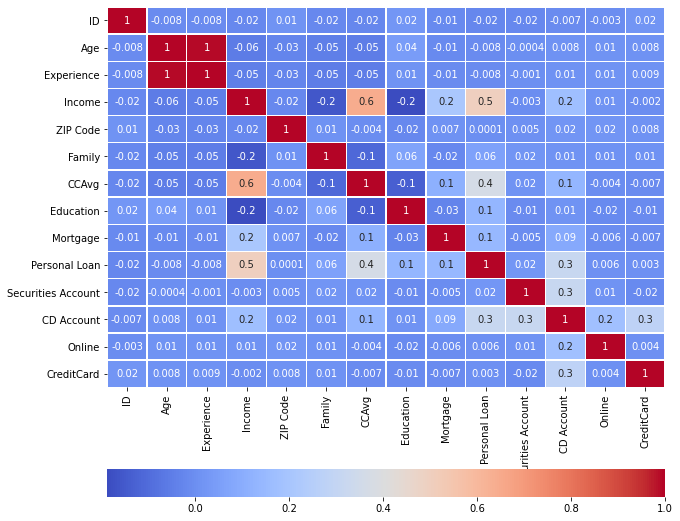

In [16]:
corrmat = dataset.corr() 
  
f, ax = plt.subplots(figsize =(10,10)) 
matrix=np.triu(dataset.corr())
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", linewidths = 0.4,annot=True,fmt='.1g',cbar_kws={'orientation':'horizontal'}) 


1.   -1 indicates a perfectly negative linear correlation between two variables.
2.   0 indicates no linear correlation between two variables.
3.   1 indicates a perfectly positive linear correlation between two variables.





# Dropping the irrelevant columns
Here ID, Experience and ZIP Code are after interpretation from the correlation matrix.

In [17]:
dataset=dataset.drop(['ID','Experience','ZIP Code'],axis=1)

In [18]:
dataset

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


# 3. Exploratory Data Analysis
*   To give insight into a data set.
*   Understand the underlying structure.
*   Extract important parameters and relationships that hold between them.
*   Test underlying assumptions.


>  Study the data distribution in each attribute and target variable.




## 3.1 Number of unique in each column

In [19]:
#THIS GIVES THE NUMBER OF UNIQUE VALUES IN EACH COLUMN 
dataset.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

## 3.2 Number of people with zero mortgage

In [20]:
#THIS GIVES THE NUMBER OF PEOPLE WITH ZERO MORTGAGE
(dataset.Mortgage==0).sum()

3462

## 3.3 Number of people with zero credit card spending per month

In [21]:
#THIS GIVES THE NUMBER OF PEOPLE WITH ZERO CREDIT CARD SPENDING PER MONTH
(dataset.CCAvg==0).sum()

106

## 3.4 Value counts of all categorical columns.

In [22]:
#This give the exact count of people in each age level
dataset.Age.value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [23]:
dataset.Income.value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

In [24]:
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [25]:
dataset.CCAvg.value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [26]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [27]:
dataset.Mortgage.value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [28]:
dataset['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [29]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [30]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [31]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [32]:
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

## 3.4 Univariate Analysis


> Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.



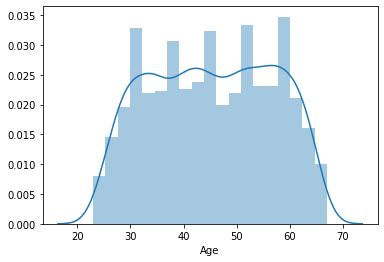

In [33]:
#Age has a Normal Distribution
sns.distplot(dataset.Age)

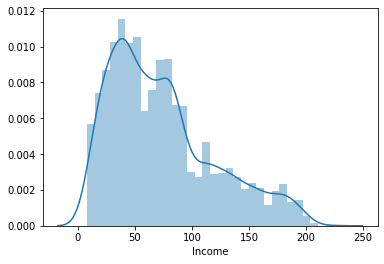

In [34]:
#The distribution is Right skewed
sns.distplot(dataset.Income)

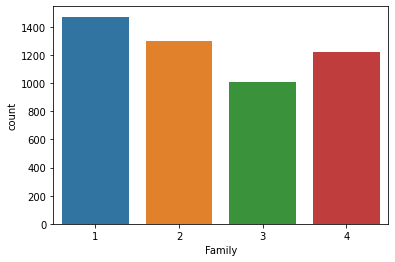

In [35]:
sns.countplot(dataset.Family)

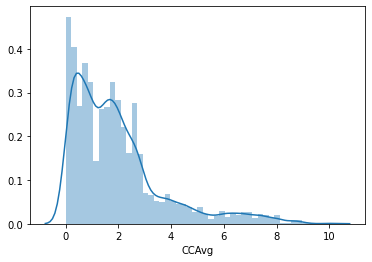

In [36]:
#The distribution is right skewed
sns.distplot(dataset.CCAvg)

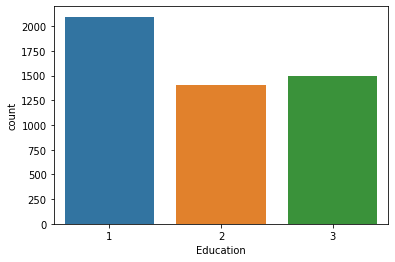

In [37]:
sns.countplot(dataset.Education)

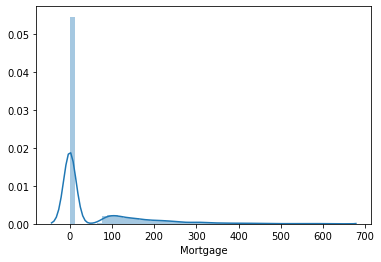

In [38]:
#Distribution of Mortgage is not Normal
sns.distplot(dataset.Mortgage)

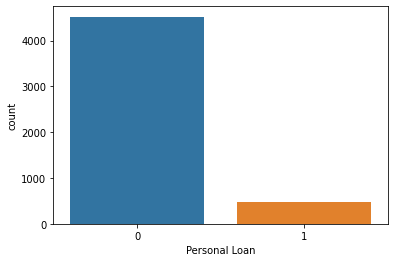

In [39]:
sns.countplot(dataset['Personal Loan'])

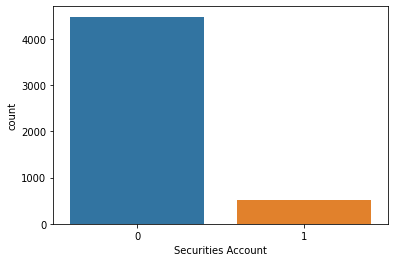

In [40]:
sns.countplot(dataset['Securities Account'])

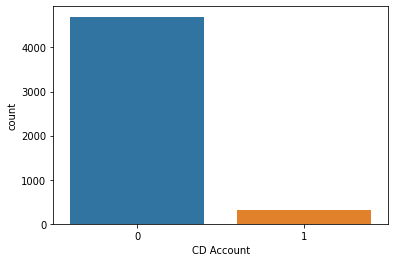

In [41]:
sns.countplot(dataset['CD Account'])

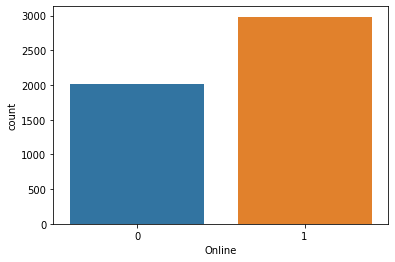

In [42]:
sns.countplot(dataset.Online)

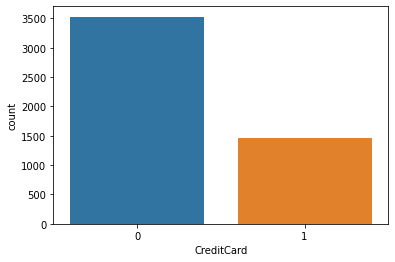

In [43]:
sns.countplot(dataset.CreditCard)

### 3.5 Multivariate Analysis
> Multivariate data analysis is a set of statistical models that examine patterns in multidimensional data by considering, at once, several data variables. It is an expansion of bivariate data analysis, which considers only two variables in its models.




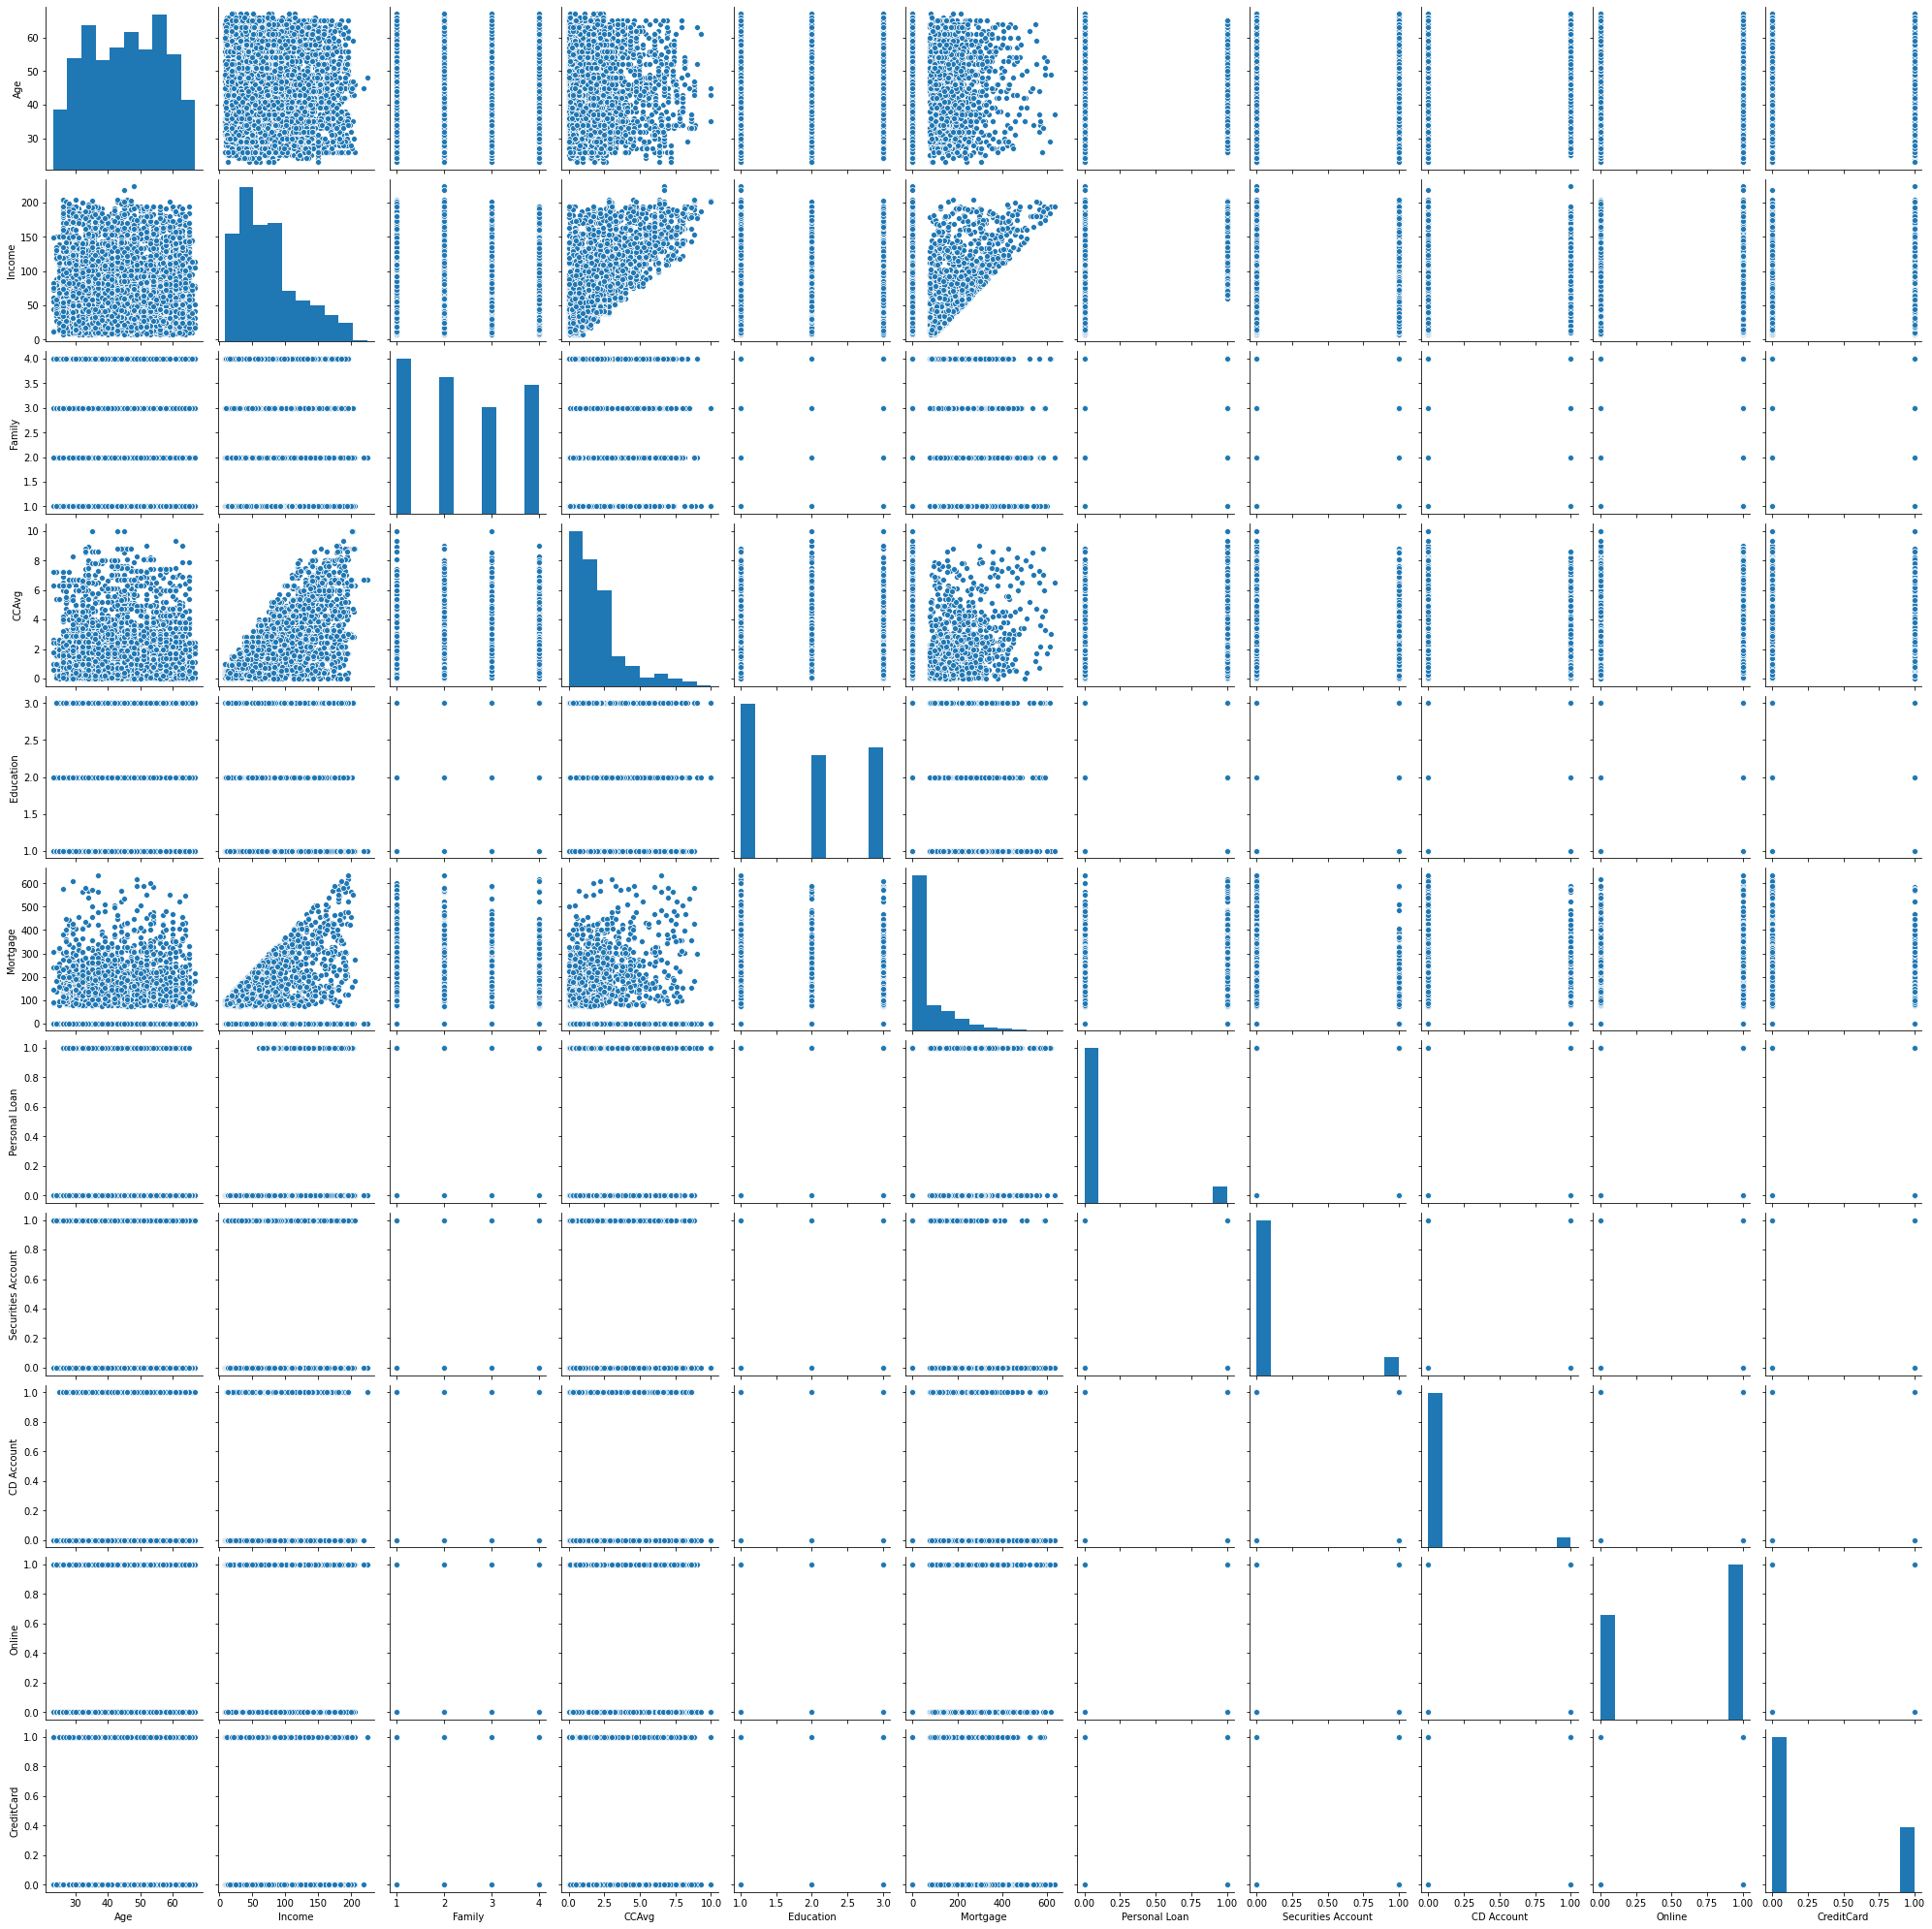

In [44]:
sns.pairplot(dataset)

In [45]:
dataset


,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0




> The dataset is divided into X and Y where X is given as input for prediction whereas Y is considered as the output.



In [46]:
Y=dataset['Personal Loan']

In [47]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [48]:
X=dataset.drop(['Personal Loan'],axis=1)

In [49]:
X

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0


# 4. Transformation of feature variables
> As we are dealing with lots of data and that data is in raw form,
before inputting that data to machine learning algorithms, we
need to convert it into meaningful data. This process is called
preprocessing the data.Scikit-learn has package named preprocessing for this purpose. 
Here We use the preprocessing technique of scaling for preprocessing
feature vectors. Scaling of feature vectors is important,
because the features should not be synthetically large or
small.


> Too many extreme values in a data set will result in a skewed distribution. Normality of data can be achieved by cleaning the data. This involves determining measurement errors, data-entry errors and outliers, and removing them from the data for valid reasons




YEO JOHNSON TRANSFORMATION
> The Yeo-Johnson transformation can be thought of as an extension of the Box-Cox transformation. It handles both positive and negative values, whereas the Box-Cox transformation only handles positive values. Both can be used to transform the data so as to improve normality.




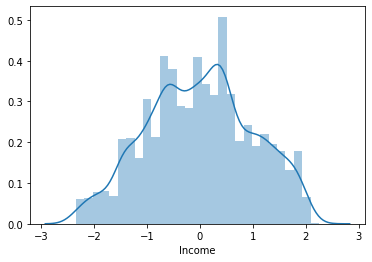

In [50]:
pt=PowerTransformer(method='yeo-johnson',standardize=True)
pt.fit(X['Income'].values.reshape(-1,1))
temp=pt.transform(X['Income'].values.reshape(-1,1))
X['Income']=temp
sns.distplot(X['Income'])

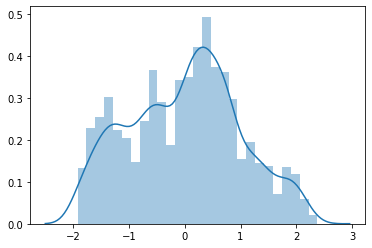

In [51]:
pt=PowerTransformer(method='yeo-johnson',standardize=True)
pt.fit(X['CCAvg'].values.reshape(-1,1))
temp=pt.transform(X['CCAvg'].values.reshape(-1,1))
X['CCAvg']=temp
sns.distplot(temp)

BINNING


> Binning is a way to group a number of more or less continuous values into a smaller number of "bins". For example, if you have data about a group of people, you might want to arrange their ages into a smaller number of age intervals.



In [52]:
#Here Mortgage is binned to certain labels as follows
X['Mortgage_New']=pd.cut(X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
X.drop('Mortgage',axis=1,inplace=True)

In [53]:
X

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
0,25,-0.373939,4,0.119380,1,1,0,0,0,0
1,45,-0.858624,3,0.045136,1,1,0,0,0,0
2,39,-2.068343,1,-0.392119,1,0,0,0,0,0
3,35,0.725215,1,0.754006,2,0,0,0,0,0
4,35,-0.491343,4,-0.392119,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,29,-0.649203,1,0.322111,3,0,0,1,0,0
4996,30,-1.775861,4,-1.146429,1,0,0,1,0,0
4997,63,-1.276084,2,-1.312209,3,0,0,0,0,0
4998,65,-0.373939,3,-0.994962,2,0,0,1,0,0


## 5. Spillting the dataset using stratified sampling


> Stratified sampling is used when the researcher wants to understand the existing relationship between two groups. The researcher can represent even the smallest sub-group in the population. ... In the proportionate random sampling, each stratum would have the same sampling fraction.



In [54]:
#Dataset is split into training and testing data in the ratio 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=0)


Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. ... If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.



In [56]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [57]:
X_train_scaled

array([[0.63636364, 0.23165157, 0.66666667, ..., 1.        , 1.        ,
        0.        ],
       [0.93181818, 0.33056921, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65909091, 0.29757718, 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.90909091, 0.30609841, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27272727, 0.44636887, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.15909091, 0.74619132, 0.33333333, ..., 1.        , 0.        ,
        0.        ]])

In [58]:
Y_train

3789    0
758     0
2868    0
2550    0
2150    0
       ..
3597    0
4670    0
988     0
2037    0
2174    0
Name: Personal Loan, Length: 3500, dtype: int64

In [59]:
X_test_scaled

array([[0.25      , 0.90267381, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.72727273, 0.59195832, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.56818182, 0.76182941, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.68181818, 0.29757718, 0.33333333, ..., 0.        , 1.        ,
        0.16666667],
       [0.25      , 0.42816231, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.48061515, 0.66666667, ..., 1.        , 0.        ,
        0.        ]])

In [60]:
Y_test

9       1
461     0
3700    0
1559    1
4558    0
       ..
2180    0
3484    0
2965    0
2493    0
3224    0
Name: Personal Loan, Length: 1500, dtype: int64

## 6.Applying Logistic Regression model



> Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression is estimating the parameters of a logistic model.Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables





In [61]:
#Building logistic regression model
logistic_regression= LogisticRegression(random_state=0,max_iter=300)
#Fitting the training data to the model
logistic_regression.fit(X_train_scaled,Y_train)
#Predicting the output against testcases
LR_Y_pred=logistic_regression.predict(X_test_scaled)

In [62]:
LR_Y_pred

array([1, 0, 0, ..., 0, 0, 0])

CONFUSION MATRIX


> A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 




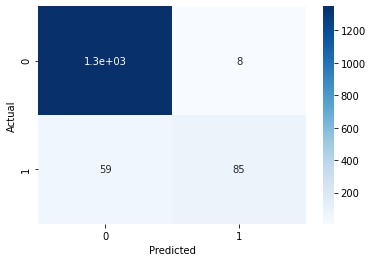

In [63]:
LR_confusion_matrix = pd.crosstab(Y_test, LR_Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(LR_confusion_matrix,annot=True,cmap='Blues')


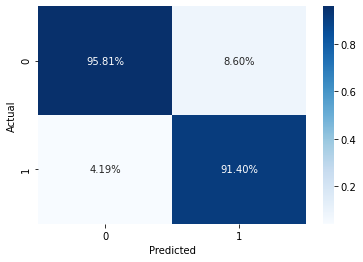

In [64]:
sns.heatmap(LR_confusion_matrix/np.sum(LR_confusion_matrix), annot=True, fmt='.2%',cmap='Blues')


In [ ]:
print('Test Accuracy: ',metrics.accuracy_score(LR_Y_pred, Y_test))

Test Accuracy:  0.9553333333333334


In [ ]:
LR_Y_pred_train=logistic_regression.predict(X_train_scaled)


In [ ]:
print('Train Accuracy: ',metrics.accuracy_score(LR_Y_pred_train, Y_train))

Train Accuracy:  0.9534285714285714


## 7. Various metrics related to regression


> **Mean Squared Error:** MSE or Mean Squared Error is one of the most preferred metrics for regression tasks. It is simply the average of the squared difference between the target value and the value predicted by the regression model. As it squares the differences, it penalizes even a small error which leads to over-estimation of how bad the model is. It is preferred more than other metrics because it is differentiable and hence can be optimized better.



> **Mean Absolute Error:** MAE is the absolute difference between the target value and the value predicted by the model. The MAE is more robust to outliers and does not penalize the errors as extremely as mse. MAE is a linear score which means all the individual differences are weighted equally. It is not suitable for applications where you want to pay more attention to the outliers.


>  **R² Error:** Coefficient of Determination or R² is another metric used for evaluating the performance of a regression model. The metric helps us to compare our current model with a constant baseline and tells us how much our model is better. The constant baseline is chosen by taking the mean of the data and drawing a line at the mean. R² is a scale-free score that implies it doesn't matter whether the values are too large or too small, the R² will always be less than or equal to 1.






In [ ]:
#Mean squared error
LR_MSE=metrics.mean_squared_error(Y_pred,Y_test)
LR_MSE

0.04466666666666667

In [ ]:
#Mean absolute error
LR_MAE=metrics.mean_absolute_error(Y_pred,Y_test)
LR_MAE

0.04466666666666667

In [ ]:
#R squared error
LR_R2_SCORE=metrics.r2_score(Y_pred,Y_test)
LR_R2_SCORE

0.23195084485407036

# 8. OTHER CLASSIFICATION ALGORITHMS



## 8.A Support Vector Machine Classifier
In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes

In [ ]:
supp_vect_mach=SVC(random_state=0,gamma='auto')
supp_vect_mach.fit(X_train_scaled,Y_train)
SVM_Y_pred=supp_vect_mach.predict(X_test_scaled)

In [ ]:
SVM_Y_pred

In [ ]:
SVM_confusion_matrix = pd.crosstab(Y_test, SVM_Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(SVM_confusion_matrix,annot=True,cmap='Blues')


In [ ]:
sns.heatmap(SVM_confusion_matrix/np.sum(SVM_confusion_matrix), annot=True, fmt='.2%',cmap='Blues')


In [ ]:
print('Test Accuracy: ',metrics.accuracy_score(SVM_Y_pred, Y_test))

Test Accuracy:  0.9553333333333334


In [ ]:
SVM_Y_pred_train=supp_vect_mach.predict(X_train_scaled)


In [ ]:
print('Train Accuracy: ',metrics.accuracy_score(SVM_Y_pred_train, Y_train))

Train Accuracy:  0.9551428571428572


### Different Metrics for Support Vector Machine





In [ ]:
SVM_MSE=metrics.mean_squared_error(SVM_Y_pred,Y_test)
SVM_MSE

0.04466666666666667

In [ ]:
SVM_MAE=metrics.mean_absolute_error(SVM_Y_pred,Y_test)
SVM_MAE

0.04466666666666667

In [ ]:
SVM_R2_SCORE=metrics.r2_score(SVM_Y_pred,Y_test)
SVM_R2_SCORE

0.14548809210022895

## 8.B Decision Tree
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [ ]:
dec_tree=DecisionTreeClassifier(random_state=0,max_depth=10)
dec_tree.fit(X_train_scaled,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

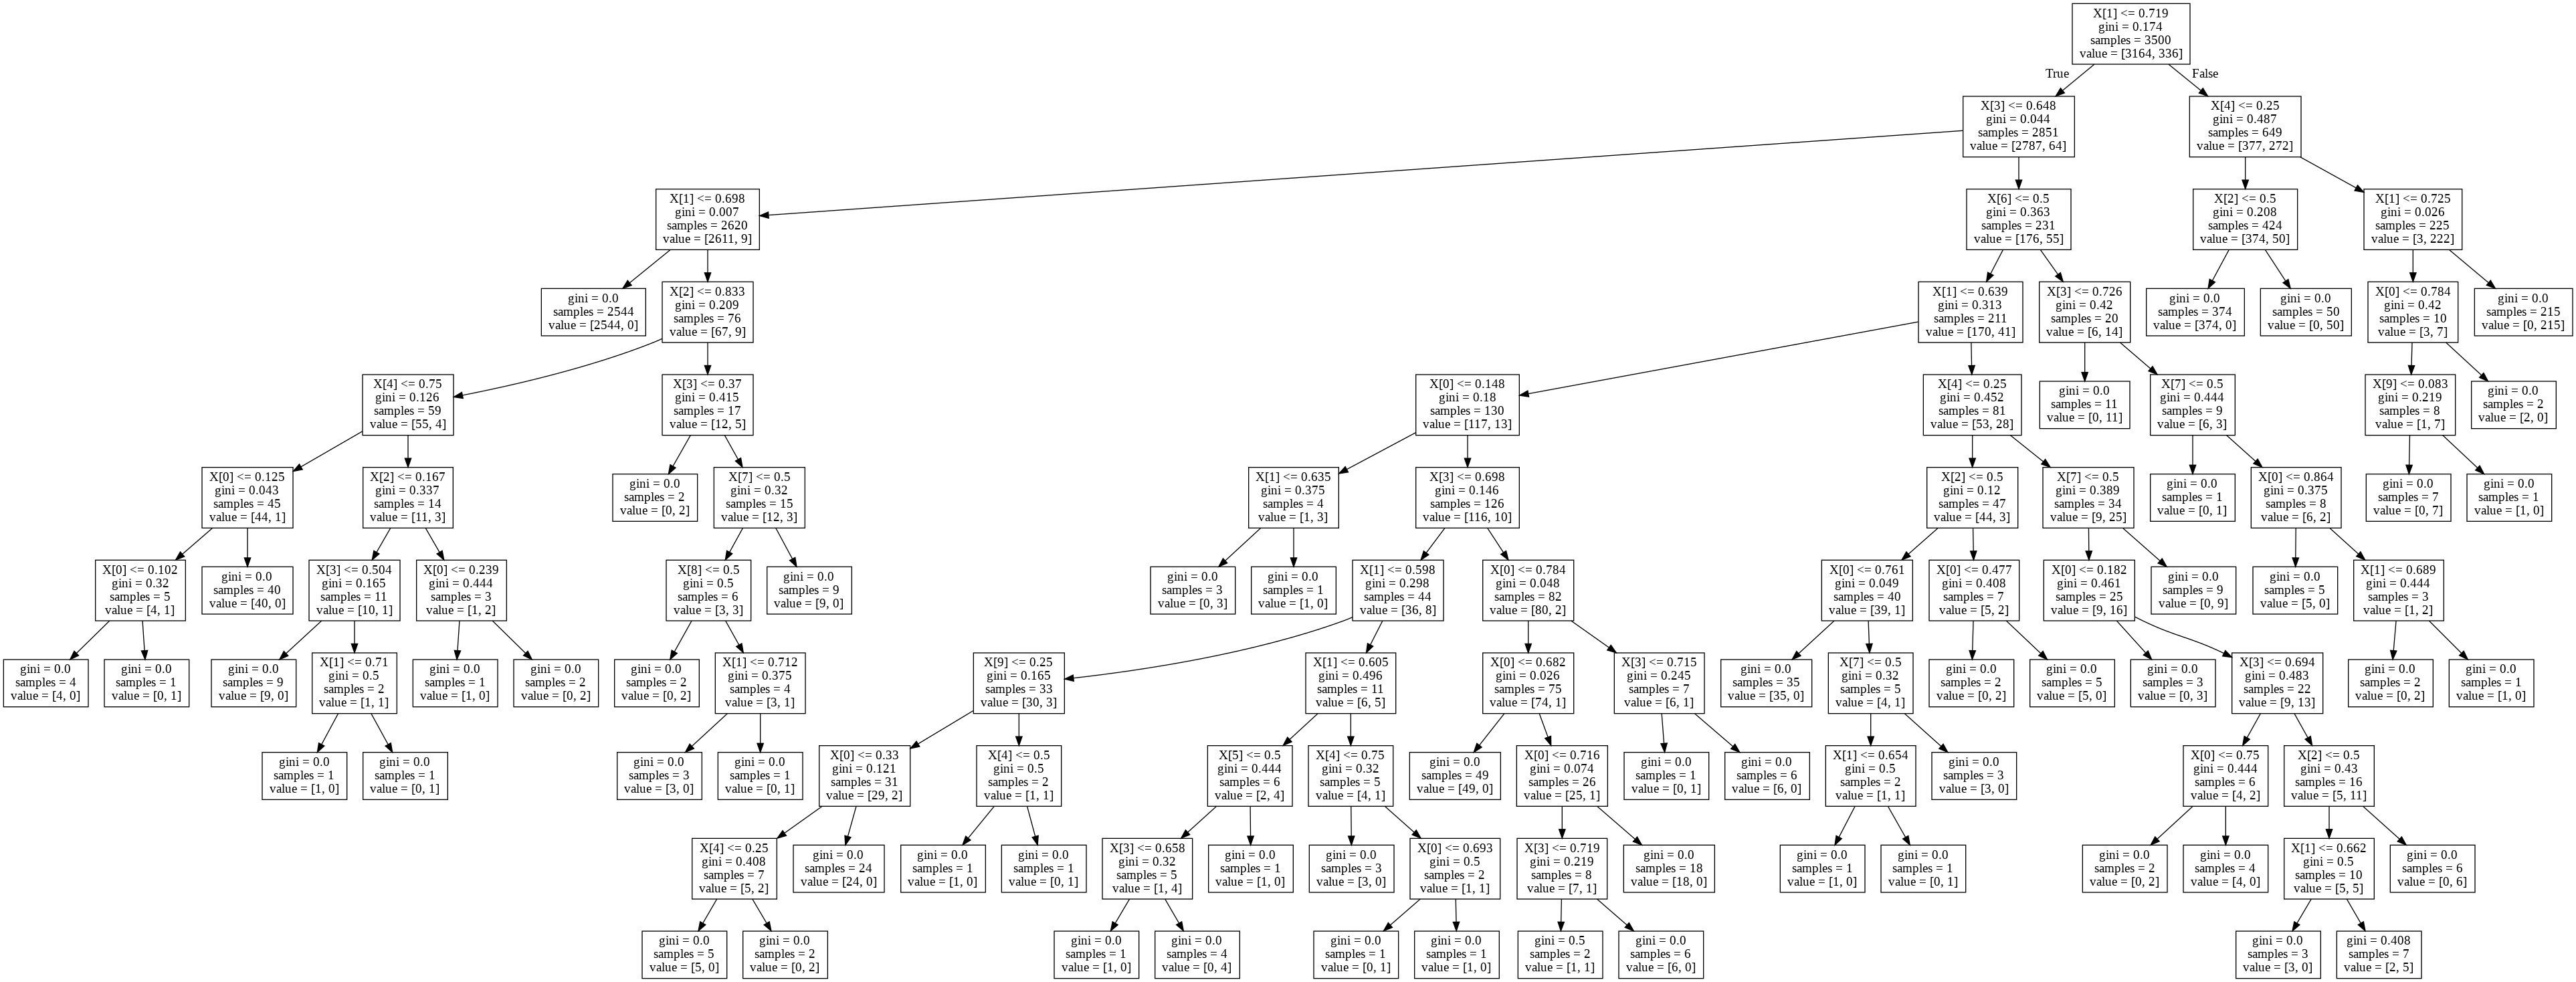

In [ ]:
dots_dec_tree=tree.export_graphviz(dec_tree,out_file=None)
graph_dec_tree=pdp.graph_from_dot_data(dots_dec_tree)
Image(graph_dec_tree.create_png())


In [ ]:
DT_Y_pred=dec_tree.predict(X_test_scaled)

In [ ]:
DT_Y_pred

In [ ]:
print('Test Accuracy: ',metrics.accuracy_score(Y_test,DT_Y_pred))

Test Accuracy:  0.9813333333333333


In [ ]:
DT_Y_pred_train=dec_tree.predict(X_train_scaled)


In [ ]:
print('Train Accuracy: ',metrics.accuracy_score(DT_Y_pred_train, Y_train))

Train Accuracy:  0.9991428571428571


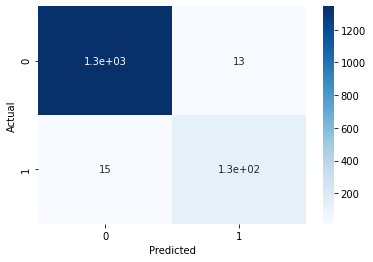

In [ ]:
DT_confusion_matrix = pd.crosstab(Y_test, DT_Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(DT_confusion_matrix,annot=True,cmap='Blues')


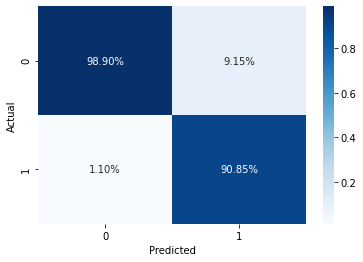

In [ ]:
sns.heatmap(DT_confusion_matrix/np.sum(DT_confusion_matrix), annot=True, fmt='.2%',cmap='Blues')


### Different metrics for Decision Tree Classifier




In [ ]:
DT_MSE=metrics.mean_squared_error(DT_Y_pred,Y_test)
DT_MSE

0.018666666666666668

In [ ]:
DT_MAE=metrics.mean_absolute_error(DT_Y_pred,Y_test)
DT_MAE

0.018666666666666668

In [ ]:
DT_R2_SCORE=metrics.r2_score(DT_Y_pred,Y_test)
DT_R2_SCORE

0.7821983447074197

## 8.C Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.Random forest has nearly the same hyperparameters as a decision tree or a bagging classifier. ... Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features.

In [ ]:
random_forest=RandomForestClassifier(random_state=0,max_depth=10,n_estimators=300)
random_forest.fit(X_train_scaled,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
RF_Y_pred=random_forest.predict(X_test_scaled)

In [ ]:
RF_Y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Test Accuracy: ',metrics.accuracy_score(Y_test,RF_Y_pred))

Test Accuracy:  0.9893333333333333


In [ ]:
RF_Y_pred_train=random_forest.predict(X_train_scaled)


In [ ]:
print('Train Accuracy: ',metrics.accuracy_score(RF_Y_pred_train, Y_train))

Train Accuracy:  0.9988571428571429


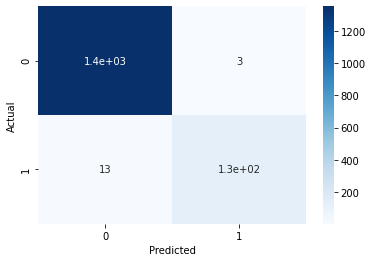

In [ ]:
RF_confusion_matrix = pd.crosstab(Y_test, RF_Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(RF_confusion_matrix,annot=True,cmap='Blues')


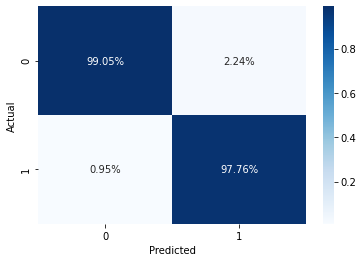

In [ ]:
sns.heatmap(RF_confusion_matrix/np.sum(RF_confusion_matrix), annot=True, fmt='.2%',cmap='Blues')

### Different Metrics for Random Forest





In [ ]:
RF_MSE=metrics.mean_squared_error(RF_Y_pred,Y_test)
RF_MSE

0.010666666666666666

In [ ]:
RF_MAE=metrics.mean_absolute_error(RF_Y_pred,Y_test)
RF_MAE

0.010666666666666666

In [ ]:
RF_R2_SCORE=metrics.r2_score(RF_Y_pred,Y_test)
RF_R2_SCORE

0.8688839841786674

## 9.COMPARISON



 > Testing accuracy for different Classifiers








In [ ]:
print('Test Accuracy for Logistic Regression    : ',metrics.accuracy_score(LR_Y_pred, Y_test))
print('Test Accuracy for Support Vector Machine : ',metrics.accuracy_score(SVM_Y_pred, Y_test))
print('Test Accuracy for Decision Tree          : ',metrics.accuracy_score(Y_test,DT_Y_pred))
print('Test Accuracy for Random Forest          : ',metrics.accuracy_score(Y_test,RF_Y_pred))




> Training accuracy for different Classifiers



In [ ]:
print('Train Accuracy for Logistic Regression     : ',metrics.accuracy_score(LR_Y_pred_train, Y_train))
print('Train Accuracy for Support Vector Machine  : ',metrics.accuracy_score(SVM_Y_pred_train, Y_train))
print('Train Accuracy for Decision Tree           : ',metrics.accuracy_score(DT_Y_pred_train, Y_train))
print('Train Accuracy for Random Forest           : ',metrics.accuracy_score(RF_Y_pred_train, Y_train))



> PLOTTING BAR GRAPHS FOR DIFFERENT METRICS CALCULATED FOR DIFFERENT CLASSIFIERS



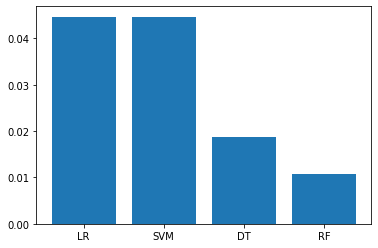

In [ ]:
#plotting graph for mean squared error for every classifier
MSE=[LR_MSE,SVM_MSE,DT_MSE,RF_MSE]
labels=['LR','SVM','DT','RF']
plt.bar(labels,MSE)
plt.show()

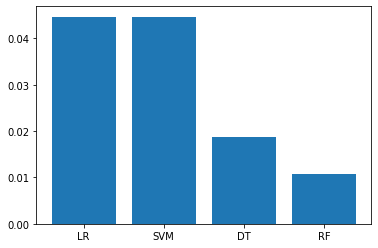

In [ ]:
#plotting graph for mean absolute error for every classifier
MAE=[LR_MAE,SVM_MAE,DT_MAE,RF_MAE]
labels=['LR','SVM','DT','RF']
plt.bar(labels,MAE)
plt.show()

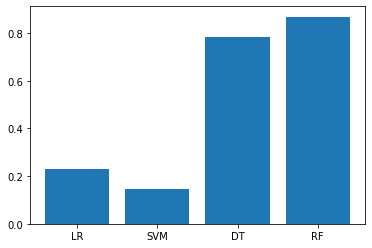

In [ ]:
#plotting graph for r squared score  for every classifier
R2_SCORE=[LR_R2_SCORE,SVM_R2_SCORE,DT_R2_SCORE,RF_R2_SCORE]
labels=['LR','SVM','DT','RF']
plt.bar(labels,R2_SCORE)
plt.show()

## 10. CONCLUSION
Business Understandong of the model
*  The dataset was given with details of 5000 cutomers with no null values
*  We have applied 4 different classification algorithms on the data after normalization and standardization.
*  From the accuracy obtained from every model,we can infer that the best model which can be used is Random Forest with testing accuracy of and Training accuracy of .
*  

